#Библиотеки, загрузка датасета


In [282]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [283]:
# Palette
hh_palette = ['#530e85', '#842eb3', '#f6c4c3','#fef0e5']

In [284]:
df = pd.read_csv("/content/DataEngineer.csv", on_bad_lines='skip')

In [285]:
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


#Задания

**Построить график компаний с самым большим кол-вом вакансий**

---


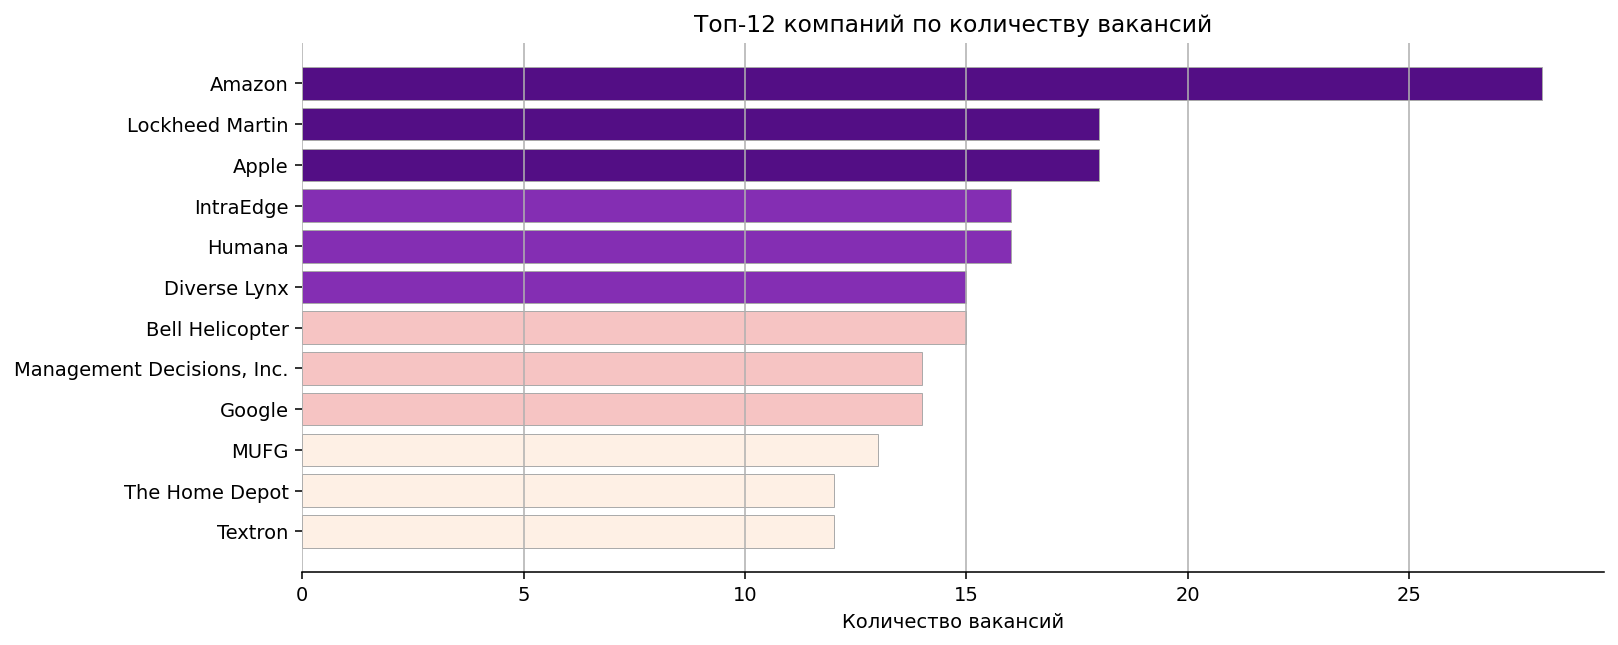

In [287]:
# почистим названия компаний
df['Company Name clean'] = df.apply(lambda x: x['Company Name'].split("\n")[0], axis=1)

data = df.groupby(['Company Name clean'])['Company Name clean'].count().sort_values(ascending=False)[:12]

color_map = [hh_palette[3] for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] =  hh_palette[0]
color_map[3] = color_map[4] = color_map[5] =  hh_palette[1]
color_map[6] = color_map[7] = color_map[8] =  hh_palette[2]

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.barh(data.index, 
        data, 
        edgecolor='darkgray',
        linewidth=0.5,
        color=color_map)
ax.invert_yaxis()
ax.xaxis.grid()
ax.set_xlabel('Количество вакансий')
ax.set_title('Топ-12 компаний по количеству вакансий')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

**Построить график самых популярный названий в вакансиях**


---


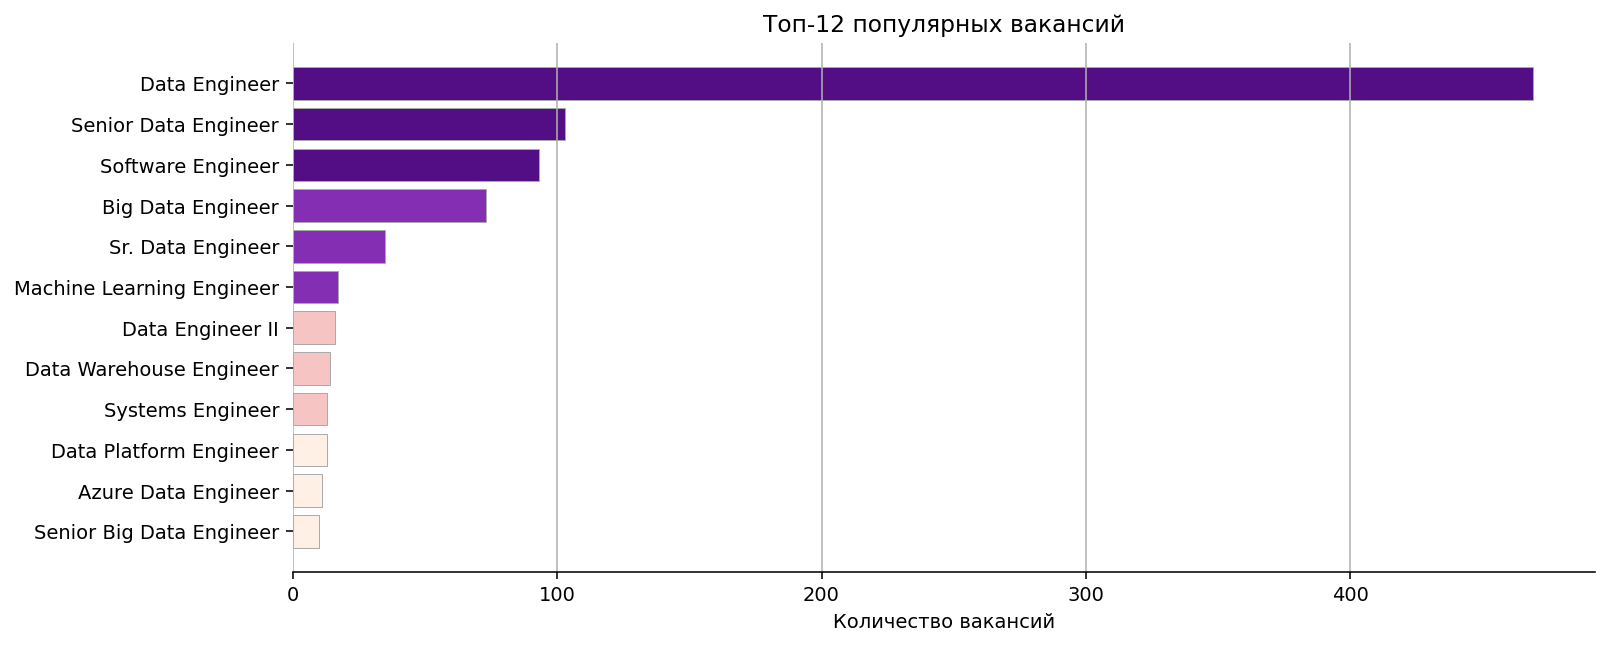

In [288]:
data = df.groupby(['Job Title'])['Job Title'].count().sort_values(ascending=False)[:12]

color_map = [hh_palette[3] for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] =  hh_palette[0]
color_map[3] = color_map[4] = color_map[5] =  hh_palette[1]
color_map[6] = color_map[7] = color_map[8] =  hh_palette[2]

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.barh(data.index, 
        data, 
        edgecolor='darkgray',
        linewidth=0.5,
        color=color_map)
ax.invert_yaxis()
ax.xaxis.grid()
ax.set_xlabel('Количество вакансий')
ax.set_title('Топ-12 популярных вакансий')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

**Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму**


---


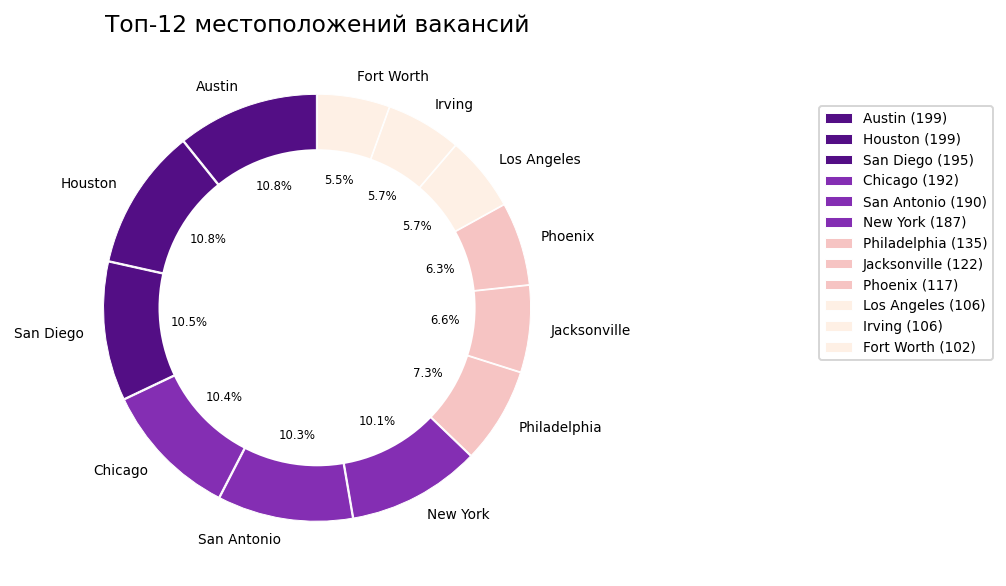

In [289]:
# почистим названия городов (удалим штат)
df["Location clean"] = df.apply(lambda x: x["Location"].split(",")[0], axis=1)

data = df.groupby(["Location clean"])["Location clean"].count().sort_values(ascending=False)[:12]

color_map = [hh_palette[3] for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] =  hh_palette[0]
color_map[3] = color_map[4] = color_map[5] =  hh_palette[1]
color_map[6] = color_map[7] = color_map[8] =  hh_palette[2]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

patches, texts, autotexts = ax.pie(data, labels=data.index, autopct="%1.1f%%", 
                                   colors=color_map, rotatelabels=False, startangle=90, 
                                   wedgeprops = {"linewidth": 0.5, "edgecolor": "w" },
                                   explode = [0.01 for i in range(12)]
                                   )

for at in texts:
  at.set_fontsize(7)
for at in autotexts:
  at.set_fontsize(6)

labels = []
for i in data.index:
  labels.append(f'{i} ({data[i]})')

centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(patches, labels, bbox_to_anchor=(1, 0.8), fontsize=7, 
           bbox_transform=plt.gcf().transFigure)
ax.set_title('Топ-12 местоположений вакансий')

plt.show()

**Построить график популярности по колонке Type of ownership, относительно численности вакансий**

---


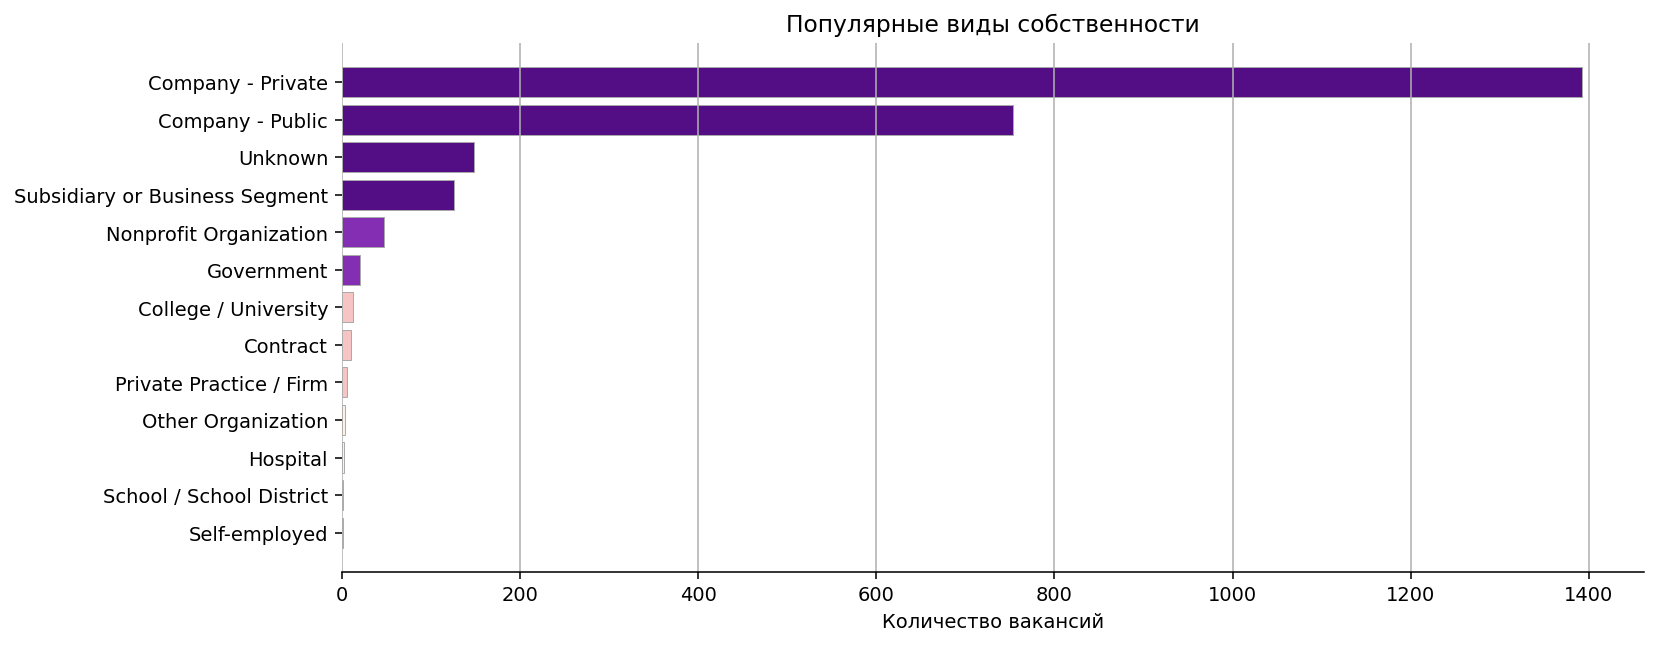

In [290]:
# вместо -1 напишем "не известно"
df.loc[(df["Type of ownership"] == "-1"), "Type of ownership"] = "Unknown"
data = df.groupby(["Type of ownership"])["Type of ownership"].count().sort_values(ascending=False)

color_map = [hh_palette[3] for _ in range(13)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] =  hh_palette[0]
color_map[4] = color_map[5] = color_map[6] = color_map[7] =  hh_palette[1]
color_map[6] = color_map[7] = color_map[8] =  hh_palette[2]

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.barh(data.index, 
        data, 
        edgecolor='darkgray',
        linewidth=0.5,
        color=color_map)
ax.invert_yaxis()
ax.xaxis.grid()
ax.set_xlabel('Количество вакансий')
ax.set_title('Популярные виды собственности')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

**Построить график популярности по секторам работы**

---


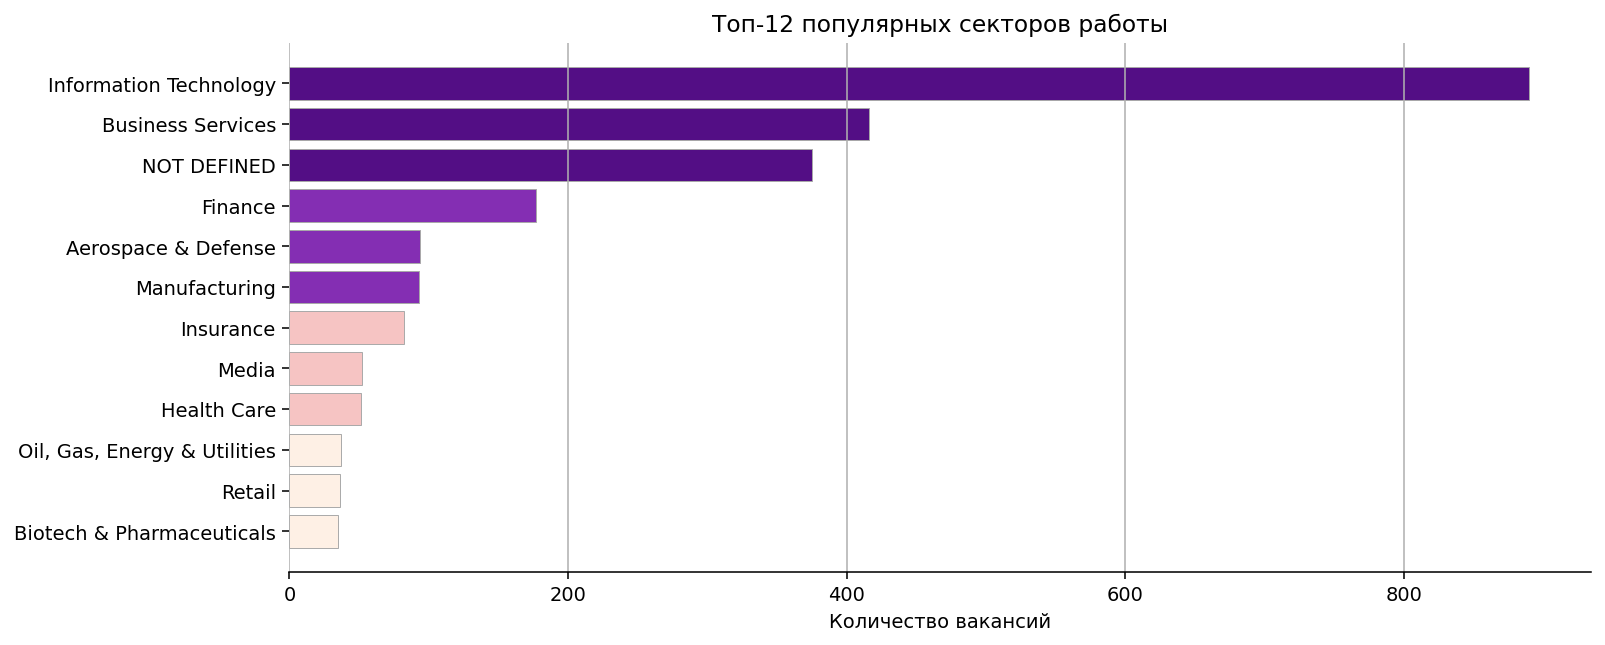

In [291]:
# вместо -1 напишем "не указано"
df.loc[(df["Sector"] == "-1"), "Sector"] = "NOT DEFINED"

data = df.groupby(["Sector"])["Sector"].count().sort_values(ascending=False)[:12]

color_map = [hh_palette[3] for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] =  hh_palette[0]
color_map[3] = color_map[4] = color_map[5] =  hh_palette[1]
color_map[6] = color_map[7] = color_map[8] =  hh_palette[2]

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.barh(data.index, 
        data, 
        edgecolor='darkgray',
        linewidth=0.5,
        color=color_map)
ax.invert_yaxis()
ax.xaxis.grid()
ax.set_xlabel('Количество вакансий')
ax.set_title('Топ-12 популярных секторов работы')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

**Построить график используя сектора работы и средний уровень зарплат в них**

---


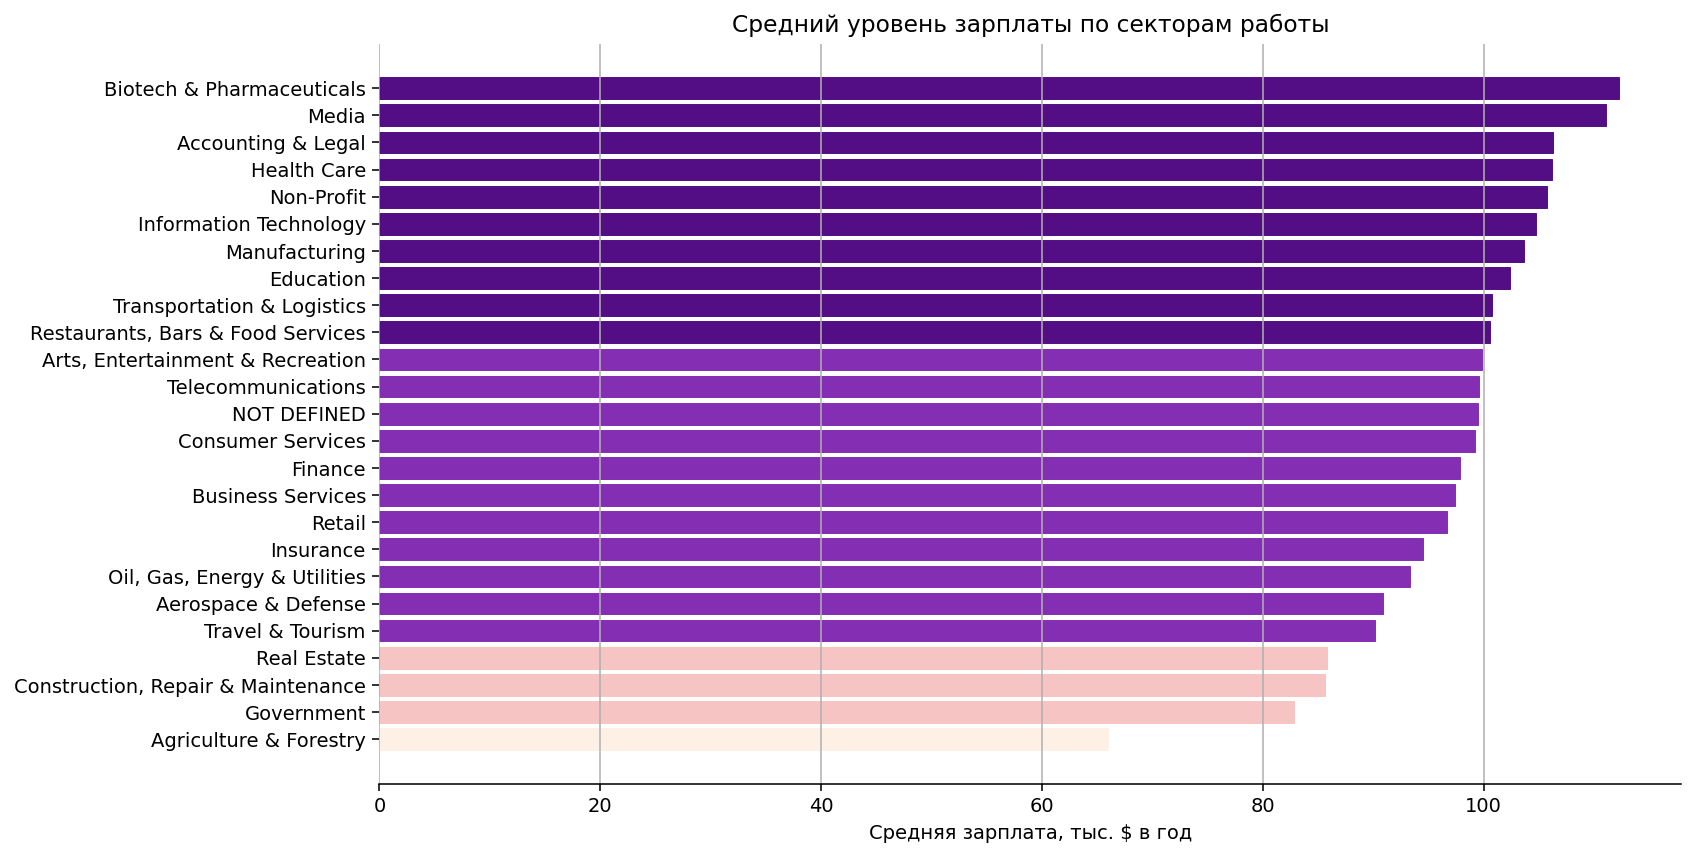

In [292]:
# почистим зарплаты: выкинем лишнее и посчитаем среднее вилки зарплаты
df["Salary clean"] = df.apply(
    lambda x: (
        int(x["Salary Estimate"]\
            .replace("(Glassdoor est.)", "")\
            .replace("(Employer est.)", "")\
            .replace("$", "")\
            .replace("K", "")\
            .split("-")[0]) + 
        int(x["Salary Estimate"]\
            .replace("(Glassdoor est.)", "")\
            .replace("(Employer est.)", "")\
            .replace("$", "")\
            .replace("K", "")\
            .split("-")[1])
        ) / 2, axis=1
    )

data = df.groupby("Sector")["Salary clean"].agg(['mean']).sort_values(by=["mean"], ascending=False)

min_salary = int(data.min()["mean"])
max_salary = int(data.max()["mean"])
frame = (max_salary - min_salary) / 4

color_map = [hh_palette[3] for _ in range(12)]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.barh(data.index, 
        data["mean"], 
        edgecolor='darkgray',
        linewidth=0.5,
        color=color_map
        )

for bar in ax.containers[0]:
  x = bar.get_width()
  if x < min_salary + frame:
      bar.set_color(hh_palette[3])
  elif x >= min_salary + frame and x < min_salary + frame * 2:
      bar.set_color(hh_palette[2])
  elif x >= min_salary + frame * 2 and x < min_salary + frame * 3:
      bar.set_color(hh_palette[1])
  else:
      bar.set_color(hh_palette[0])

ax.invert_yaxis()
ax.xaxis.grid()
ax.set_xlabel('Средняя зарплата, тыс. $ в год')
ax.set_title('Средний уровень зарплаты по секторам работы')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

**Построить гистограмму распределения рейтинга компаний**

---


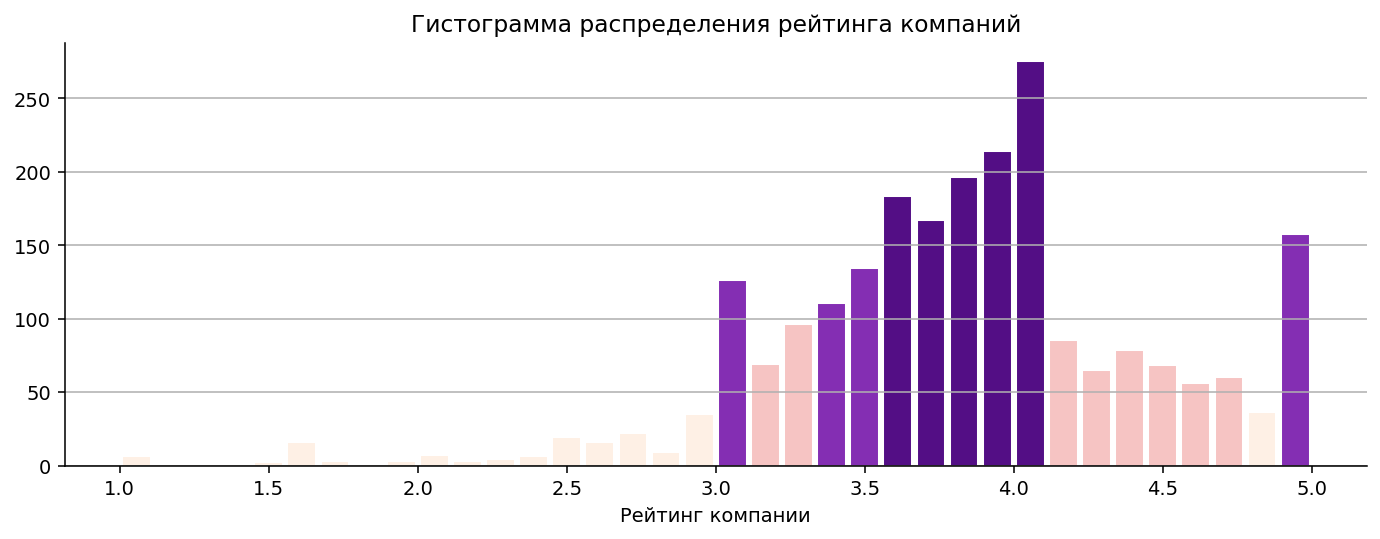

In [293]:
# не берём компании с рейтингом -1
data = df.loc[df["Rating"] != -1]

bins = data.groupby(["Rating"])["Rating"].count().count()
max_value = data.groupby(["Rating"])["Rating"].count().max()
frame = max_value / 4

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.hist(data["Rating"], bins=bins, rwidth=0.75)

for bar in ax.containers[0]:
    x = bar.get_height()
    if x < frame:
        bar.set_color(hh_palette[3])
    elif x >= frame and x < frame * 2:
        bar.set_color(hh_palette[2])
    elif x >= frame * 2 and x < frame * 3:
        bar.set_color(hh_palette[1])
    else:
        bar.set_color(hh_palette[0])

ax.yaxis.grid()
ax.set_xlabel('Рейтинг компании')
ax.set_title('Гистограмма распределения рейтинга компаний')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()





**Построить график средних зарплат по популярным компаниям**

---


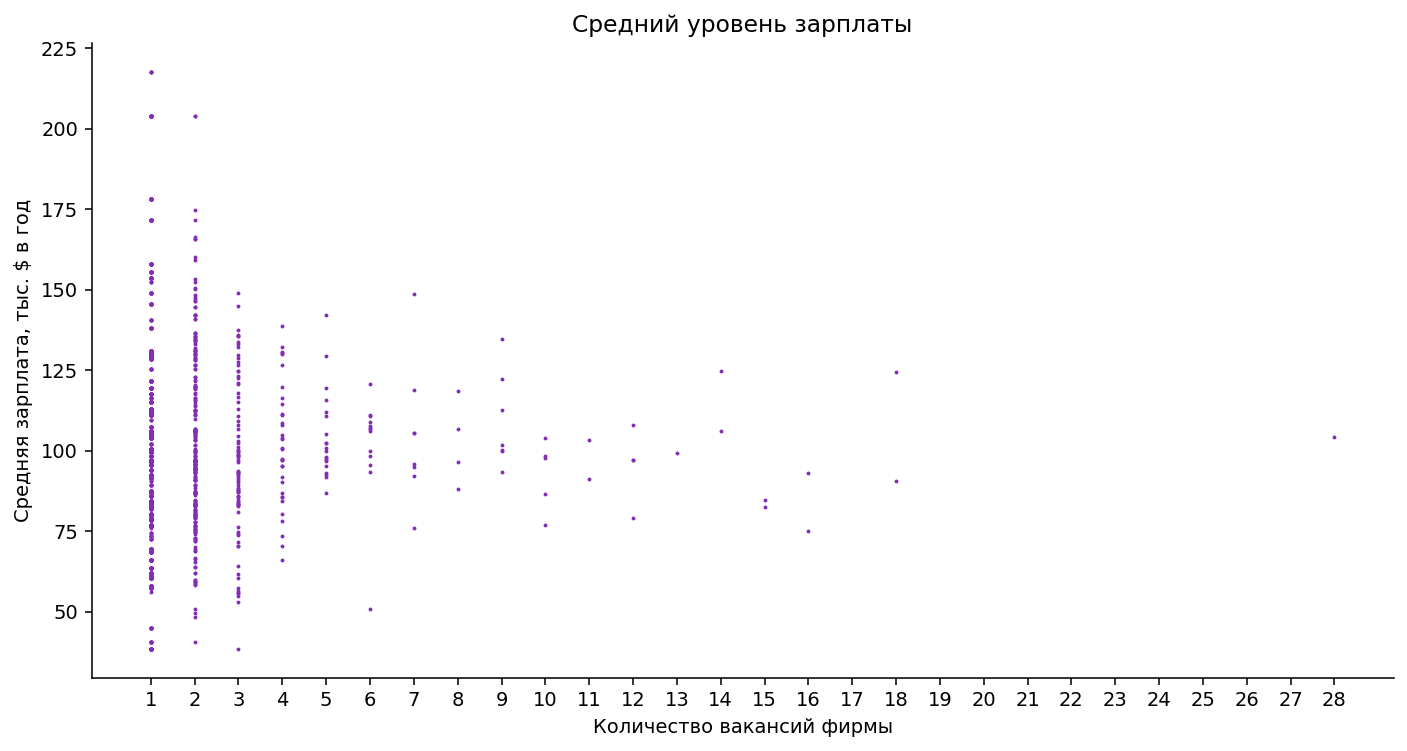

In [294]:
# почистим зарплаты, если ещё не очищены: выкинем лишнее и посчитаем среднее вилки зарплаты
df["Salary clean"] = df.apply(
    lambda x: (
        int(x["Salary Estimate"].replace("(Glassdoor est.)", "")\
            .replace("(Employer est.)", "")\
            .replace("$", "")\
            .replace("K", "")\
            .split("-")[0]) + 
        int(x["Salary Estimate"]\
            .replace("(Glassdoor est.)", "")\
            .replace("(Employer est.)", "")\
            .replace("$", "")\
            .replace("K", "")\
            .split("-")[1])
        ) / 2, axis=1
    )
# почистим названия компаний, если ещё не очищены
df['Company Name clean'] = df.apply(lambda x: x['Company Name']\
                                    .split("\n")[0], axis=1)

data = df.groupby("Company Name clean")["Salary clean"] \
                  .agg(["mean", "count"]) \
                  .round({"mean":2}) \
                  .sort_values(by=["count"], ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.scatter(data["count"], data["mean"], color=hh_palette[1], s=1)

plt.xticks([i for i in range(1, data["count"].max() + 1)])
ax.set_ylabel('Средняя зарплата, тыс. $ в год')
ax.set_xlabel('Количество вакансий фирмы')
ax.set_title('Средний уровень зарплаты')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

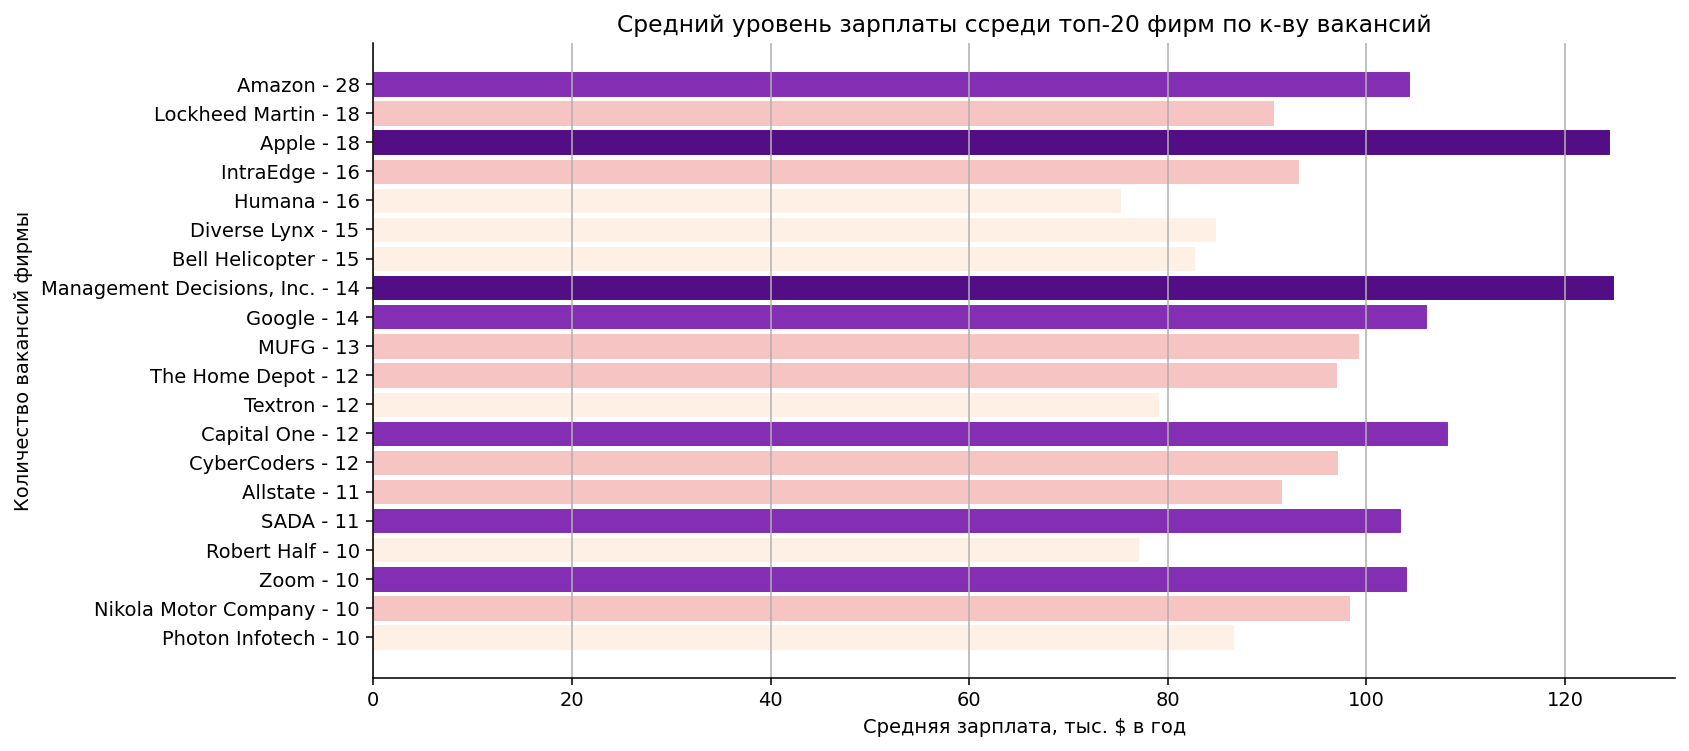

In [295]:
data1 = pd.DataFrame(data[:20])

company_names_with_cnt = []
for i in data1.index:
  company_names_with_cnt.append(f"{i} - {data1['count'][i]}")

min_salary = int(data1.min()["mean"])
max_salary = int(data1.max()["mean"])
frame = (max_salary - min_salary) / 4

fig1, ax1 = plt.subplots(1, 1, figsize=(12, 6))

ax1.barh(company_names_with_cnt, 
         data1["mean"], 
         edgecolor='darkgray',
         linewidth=0.5,
         color=color_map
         )

for bar in ax1.containers[0]:
  x = bar.get_width()
  if x < min_salary + frame:
      bar.set_color(hh_palette[3])
  elif x >= min_salary + frame and x < min_salary + frame * 2:
      bar.set_color(hh_palette[2])
  elif x >= min_salary + frame * 2 and x < min_salary + frame * 3:
      bar.set_color(hh_palette[1])
  else:
      bar.set_color(hh_palette[0])

ax1.invert_yaxis()
ax1.xaxis.grid()
ax1.set_xlabel('Средняя зарплата, тыс. $ в год')
ax1.set_ylabel('Количество вакансий фирмы')
ax1.set_title('Средний уровень зарплаты cсреди топ-20 фирм по к-ву вакансий')

for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)

plt.show()

**Построить по описанию вакансий облако тегов, исследовать самые популярные слова**

---



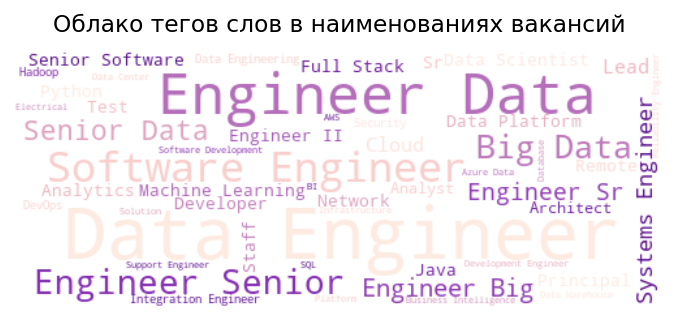

In [296]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", hh_palette)

text = str(list(df['Job Title']))\
                .replace(',', '')\
                .replace('[', '')\
                .replace("'", '')\
                .replace(']', '')\
                .replace('.', '')\
                .replace('(', '')\
                .replace(')', '')

wordcloud = WordCloud(background_color='white', 
                      width=500,  
                      height=200, 
                      colormap=cmap, 
                      max_words=50).generate(text)

# plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Облако тегов слов в наименованиях вакансий", pad=10)
plt.show()

**В графиках использовать основные цвета сайта hh.ru**

---



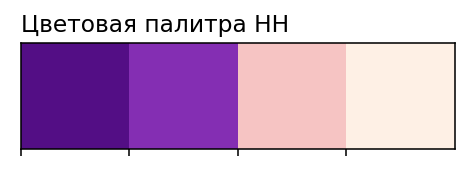

In [299]:
# Palette
hh_palette = ['#530e85', '#842eb3', '#f6c4c3','#fef0e5']
sns.palplot(hh_palette)
plt.title("Цветовая палитра HH",loc='left')
plt.show()